In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dataset import ChiMode, get_data_parallel
from metrics import angle_error, relative_amplitude_error
import numpy as np

In [3]:
X, B = get_data_parallel("data/isotropic_chi_v2", chi_mode=ChiMode.ISOTROPIC)

In [4]:
B_demag = B[...,:3]
B_ana = B[...,3:]
chi = X[:,0,2]
a = X[:,0,0]
b = X[:,0,1]

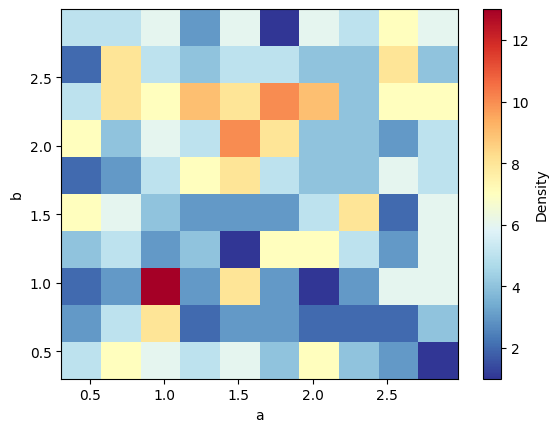

In [5]:
import matplotlib.pyplot as plt

plt.hist2d(a, b, bins=10, cmap="RdYlBu_r")
plt.colorbar(label="Density")
plt.xlabel("a")
plt.ylabel("b")
plt.show()

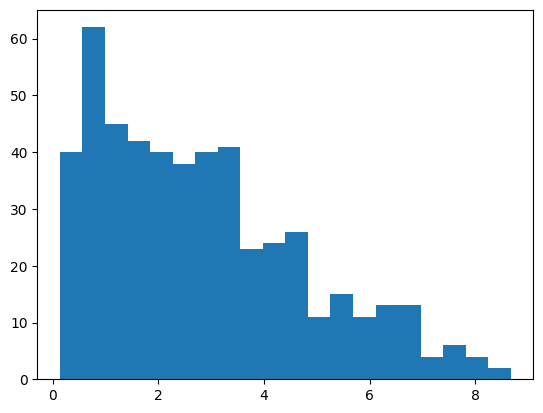

In [6]:
vol = a * b 
plt.hist(vol, bins=20)
plt.show()

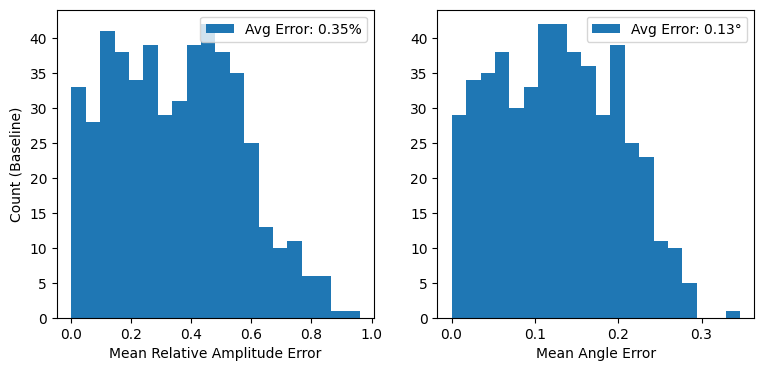

In [7]:
from plotting import plot_baseline_histograms

angle_errors_baseline = np.mean(angle_error(B_demag, B_ana), axis=1)
amp_errors_baseline = np.mean(relative_amplitude_error(B_demag, B_ana), axis=1)

stats = {
    "angle_errors_baseline": angle_errors_baseline,
    "amp_errors_baseline": amp_errors_baseline,
}

plot_baseline_histograms(stats, show_plot=True, save_path=None, figsize = (9, 4), bins=20)

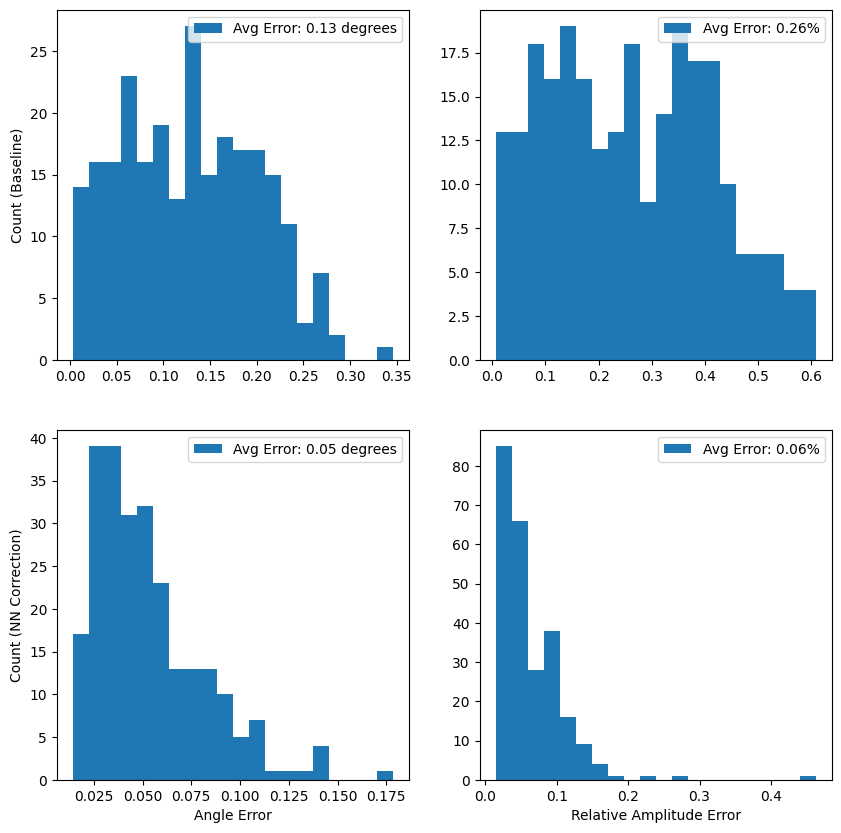

In [13]:
import json
from plotting import plot_histograms

with open("results/2024-11-04 15:50:30.286600/val_stats.json", "r") as f:
    stats = json.load(f)

plot_histograms(stats=stats, save_path=None, show_plot=True)